# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [222]:
import sys  
sys.path.insert(1, './../../../ESN-IP/IP/.')

In [240]:
import random
import numpy as np
import torch
random.seed(50)

#### Import experiment data 

In [224]:
from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [225]:
N_UNITS = 250

In [9]:
W_range=(-0.5, 0.5)
initial_rho = 0.5
desired_rhos = [0.95, 0.95, 0.95, 0.95]
bias_range = [-0.1, 0.1]

In [226]:
from ESN import Reservoir


simple_reservoir = Reservoir(N = N_UNITS, ro_rescale = 0.85, bias = True, W_range=(-1.8, 0.8), bias_range = [-0.5, 1.2, ], activation=torch.nn.Tanh())

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## EVAUALTUION IN ESN

In [244]:
X_TR.unsqueeze(1)

tensor([[0.0000],
        [0.0000],
        [0.0000],
        ...,
        [0.3032],
        [0.2522],
        [0.2472]], dtype=torch.float64)

In [245]:
X_TR.shape

torch.Size([8000])

In [247]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
simple_esn.reservoir.reset_initial_state()
simple_esn.train(X_TR, Y_TR, 0)

Reservoir warmed up with the first 100 time steps


array([0.25378418, 0.25463867, 0.23999023, ..., 0.29278564, 0.2746582 ,
       0.23034668], dtype=float32)

In [248]:
simple_esn.readout.clf.intercept_

727.62354

### COMPARISON ON TEST DATA

In [227]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021506295348022106


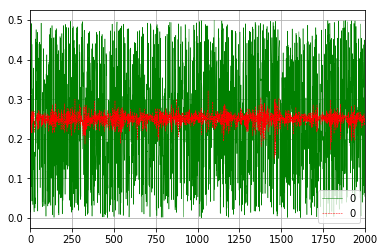

In [249]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [14]:
simple_esn.MemoryCapacity()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.26949e-09): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.71786e-09): result may not be accurate.
  overwrite_a=True).T


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.26757e-09): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.27458e-09): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.25315e-09): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.27043e-09): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.27354e-09): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarni

tensor(9.6572)

## LYAPUNOV EXPONENTS

In [15]:
simple_esn.reservoir.LCE(X_TS)

-0.49692902

## DEVIATION FROM LINEARITY

In [16]:
simple_esn.reservoir.de_fi()

0.1186635649693219

## GAUSSIAN IP RESERVOIR

In [156]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(N = N_UNITS, bias = True, mask=IPMask.gaussian(N_UNITS, std=0.4, apply_activation=True), )

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u


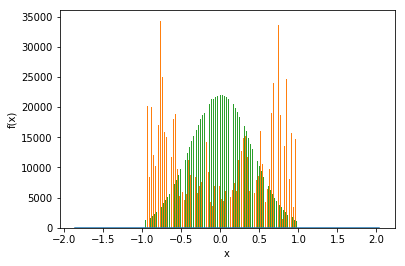

In [157]:
ip_reservoir.pre_train(X_TR, epochs=0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [158]:
ip_reservoir.safe_mode_pre_train(X_TR, max_epochs=15, eta=0.0000025, max_rho=0.96)

Epoch: 0) - Safe mode traning - Learning Rate = 2.5e-06
- Epoch: 1) | KL Divergence value: 0.2818545401096344. | Spectral radius: 0.9444724321365356
Epoch: 1) - Safe mode traning - Learning Rate = 2.5e-06
- Epoch: 1) | KL Divergence value: 0.3100818991661072. | Spectral radius: 1.0734140872955322
Too high spectral radius: 1.0734140872955322, rolling back to previous state!
- Epoch: 1) | KL Divergence value: 0.2744291126728058. | Spectral radius: 0.9188905954360962
Epoch: 2) - Safe mode traning - Learning Rate = 6.25e-07
- Epoch: 1) | KL Divergence value: 0.28185683488845825. | Spectral radius: 0.9444666504859924
Epoch: 3) - Safe mode traning - Learning Rate = 6.25e-07
- Epoch: 1) | KL Divergence value: 0.28917285799980164. | Spectral radius: 0.9715650677680969
Too high spectral radius: 0.9715650677680969, rolling back to previous state!
- Epoch: 1) | KL Divergence value: 0.2800086438655853. | Spectral radius: 0.9379203915596008
Epoch: 4) - Safe mode traning - Learning Rate = 1.5625e-07

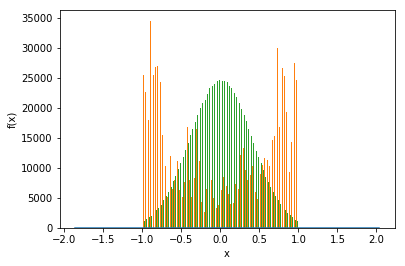

In [159]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity(apply_activation_Y=False)

In [163]:
ip_reservoir.kl_value

tensor([0.2860])

In [161]:
EchoStateNetwork(ip_reservoir).MemoryCapacity()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43398e-10): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43209e-10): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43613e-10): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43326e-10): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43834e-10): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarni

tensor(9.1328)

## INVERTED KL DIVERGENCE

In [117]:
inverted_ip_reservoir = IPReservoir(N = N_UNITS, bias = True, mask=IPMask.gaussian(N_UNITS, std=0.314, apply_activation=False), )

inverted_ip_reservoir.W_x = W_x
inverted_ip_reservoir.W_u = W_u
inverted_ip_reservoir.b_x = b_x
inverted_ip_reservoir.b_u = b_u

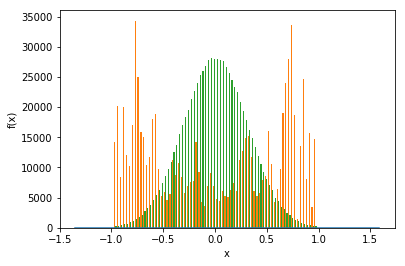

In [118]:
inverted_ip_reservoir.pre_train(X_TR, epochs=0)
inverted_ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
inverted_ip_reservoir.plot_global_neural_activity(apply_activation_Y=False)

In [112]:
inverted_ip_reservoir.rescale_weights(0.25)

In [151]:
inverted_ip_reservoir.pre_train(X_TR, eta=-0.000000025, epochs=15)

- Epoch: 1) | KL Divergence value: 0.10598589479923248. | Spectral radius: 0.8685606122016907
- Epoch: 2) | KL Divergence value: 0.1060628741979599. | Spectral radius: 0.8631954789161682
- Epoch: 3) | KL Divergence value: 0.1059814915060997. | Spectral radius: 0.8559832572937012
- Epoch: 4) | KL Divergence value: 0.10577844828367233. | Spectral radius: 0.8557656407356262
- Epoch: 5) | KL Divergence value: 0.10557550191879272. | Spectral radius: 0.8555738925933838
- Epoch: 6) | KL Divergence value: 0.10537246614694595. | Spectral radius: 0.85541170835495
- Epoch: 7) | KL Divergence value: 0.10516947507858276. | Spectral radius: 0.8552888035774231
- Epoch: 8) | KL Divergence value: 0.1049666702747345. | Spectral radius: 0.8552147150039673
- Epoch: 9) | KL Divergence value: 0.10476310551166534. | Spectral radius: 0.8552052974700928
- Epoch: 10) | KL Divergence value: 0.10455938428640366. | Spectral radius: 0.8552452921867371
- Epoch: 11) | KL Divergence value: 0.1043432429432869. | Spectr

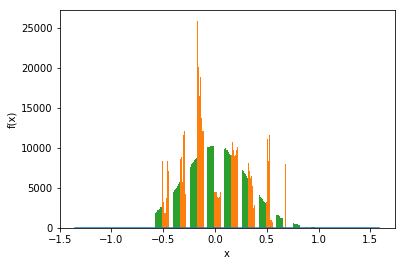

In [152]:
inverted_ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
inverted_ip_reservoir.plot_global_neural_activity()

In [164]:
inverted_ip_reservoir.max_eigs()

tensor(0.8536)

In [154]:
inverted_ip_reservoir.kl_value

tensor([0.1037])

In [155]:
EchoStateNetwork(inverted_ip_reservoir).MemoryCapacity()

tensor(10.3170)

In [141]:
inverted_ip_esn = EchoStateNetwork(inverted_ip_reservoir)

In [142]:
inverted_ip_esn.train(X_TR, Y_TR, 0)

Reservoir warmed up with the first 100 time steps


array([0.25390625, 0.25097656, 0.24121094, ..., 0.3017578 , 0.27246094,
       0.24316406], dtype=float32)

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021384411005343554


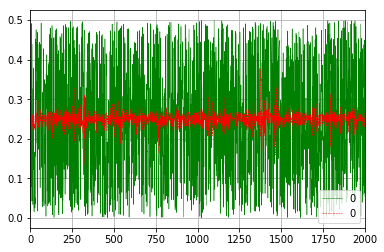

In [143]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { inverted_ip_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

## Trimodal IP

In [220]:
trimodal_reservoir = IPReservoir(N = N_UNITS, bias = True, mask=IPMask.trimodal(N_UNITS, linear_rate=7/10 ,std_lin=0.25, std_bim=0.07, mu=0.92, apply_activation=True) )

trimodal_reservoir.W_x = W_x
trimodal_reservoir.W_u = W_u
trimodal_reservoir.b_x = b_x
trimodal_reservoir.b_u = b_u

In [221]:
trimodal_reservoir.pre_train(X_TR, epochs=0)
trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
trimodal_reservoir.plot_global_neural_activity(apply_activation_Y=False)

KeyboardInterrupt: 

In [196]:
trimodal_reservoir.pre_train(X_TR, eta=-0.00000025, epochs=15)

- Epoch: 1) | KL Divergence value: 0.2006463259458542. | Spectral radius: 0.5036907196044922
- Epoch: 2) | KL Divergence value: 0.19974738359451294. | Spectral radius: 0.5047166347503662
- Epoch: 3) | KL Divergence value: 0.19909898936748505. | Spectral radius: 0.5050014853477478
- Epoch: 4) | KL Divergence value: 0.19852212071418762. | Spectral radius: 0.5080919861793518
- Epoch: 5) | KL Divergence value: 0.19816426932811737. | Spectral radius: 0.5091618895530701
- Epoch: 6) | KL Divergence value: 0.1977497935295105. | Spectral radius: 0.5085960030555725
- Epoch: 7) | KL Divergence value: 0.19746017456054688. | Spectral radius: 0.5124868750572205
- Epoch: 8) | KL Divergence value: 0.19790023565292358. | Spectral radius: 0.5118640661239624
- Epoch: 9) | KL Divergence value: 0.19734224677085876. | Spectral radius: 0.5071712732315063
- Epoch: 10) | KL Divergence value: 0.19697970151901245. | Spectral radius: 0.5090190172195435
- Epoch: 11) | KL Divergence value: 0.19687187671661377. | Sp

In [198]:
trimodal_reservoir.rescale_weights(0.95)

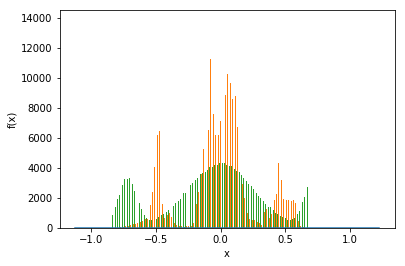

In [199]:
trimodal_reservoir.pre_train(X_TR, epochs=0)
trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
trimodal_reservoir.plot_global_neural_activity(apply_activation_Y=False)

In [200]:
trimodal_reservoir.pre_train(X_TR, eta=-0.00000025, epochs=5)

- Epoch: 1) | KL Divergence value: 0.1975010186433792. | Spectral radius: 0.9485515356063843
- Epoch: 2) | KL Divergence value: 0.19553562998771667. | Spectral radius: 0.9705076813697815
- Epoch: 3) | KL Divergence value: 0.1954466551542282. | Spectral radius: 0.972710371017456
- Epoch: 4) | KL Divergence value: 0.19540996849536896. | Spectral radius: 0.9745079278945923
- Epoch: 5) | KL Divergence value: 0.19374853372573853. | Spectral radius: 0.9731574654579163


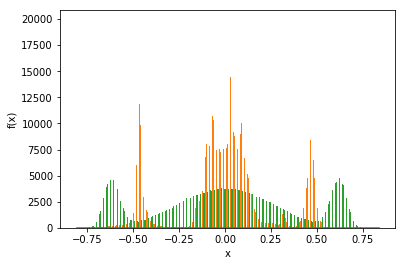

In [203]:
trimodal_reservoir.pre_train(X_TR, epochs=0)
trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
trimodal_reservoir.plot_global_neural_activity(apply_activation_X=True, apply_activation_Y=True)

In [209]:
trimodal_reservoir.rescale_weights(0.8)

In [214]:
trimodal_esn = EchoStateNetwork(trimodal_reservoir)

Reservoir warmed up with the first 100 time steps
NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021545527595481416


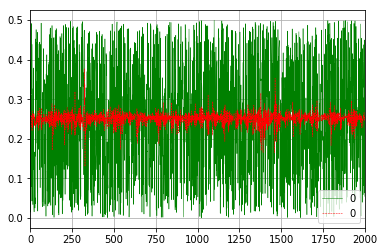

In [215]:
trimodal_esn.train(X_TR, Y_TR, 0)
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { trimodal_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )